In [ ]:
import sys

if hasattr(sys, 'base_prefix'):
    print(f"base: {sys.base_prefix}")

if hasattr(sys, 'real_prefix'):
    print(f"real: {sys.real_prefix}")

if hasattr(sys, 'prefix'):
    print(f"prfx: {sys.prefix}")

base: /usr
prfx: /usr


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from tqdm import tqdm

In [ ]:
data_path = '/content/drive/MyDrive/Colab Notebooks/chatClassifier/KakaoTalkChats.txt'

gift_text = ['선착순 선물 게임을 시작합니다! 기회는 단 10분간, 선착순 ',
             '축하합니다. 선착순 선물에 당첨되었어요!',
             '선착순 선물 게임이 곧 종료됩니다. 아직 늦지 않았어요!',
             '선착순 선물 게임이 종료되었습니다. 누가누가 빨랐을까요?']

In [ ]:
def txt_to_lst(lst):
    time_period_flag = False
    with open(data_path, 'r') as f:
        for line in tqdm(f.readlines()):
            line = line.strip()

            if line[:len(start_date)]==start_date:
                time_period_flag = True

            if time_period_flag==True and line[:len(tda_end_date)]==tda_end_date:
                break

            if time_period_flag==True:
                if line[:2] == '20' and '년' in line and '월' in line and '일' in line and ('오전' in line or '오후' in line) and line.count(':') == 2:

                    index_comma = line.index(',')
                    index_colon = line.index(':', index_comma)
                    name = line[index_comma+2:index_colon-1]

                    text_ignore_flag = False
                    text = line[index_colon+2:]
                    # for text_to_ignore in gift_text:
                    #     if text_to_ignore in text:
                    #         text_ignore_flag = True
                    # if text=='이모티콘':
                    #     text_ignore_flag = True
                    # if text=='사진':
                    #     text_ignore_flag = True

                    if text_ignore_flag==False:
                        lst.append([name, text])

In [ ]:
start_date = '2022년 1월 1일'
tda_end_date = '2023년 1월 1일'

train_lst = []
txt_to_lst(train_lst)
len(train_lst)

 98%|█████████▊| 3032549/3097114 [00:05<00:00, 593953.76it/s]


960588

In [ ]:
train_df = pd.DataFrame(train_lst, columns=['name', 'text'])

In [ ]:
counts = train_df['name'].value_counts()
participants_df = counts.sort_values(ascending=False).reset_index()
participants_df.columns = ['name', 'count']

bot_index = list(participants_df['name']).index("방장봇")
participants = list(participants_df['name'][:bot_index+1])
print(len(participants))
participants_df = participants_df[participants_df['name'].isin(participants)]

participants_df['index'] = participants_df.index
participants_df = participants_df.drop(columns=['count'])

name2index = participants_df.set_index('name').to_dict()['index']
index2name = participants_df.set_index('index').to_dict()['name']
print(name2index)
print(index2name)

62
{'爱德华/잠실르엘판매중/25': 0, '랄프': 1, '박찬홍/ 주생아/엉아들 잘부탁해~': 2, 'Dool Lee/도시빈민/외노자': 3, '원정': 4, '안정현 / 도태솔로': 5, '李在明/중앙대/인천/의원': 6, '라테라테': 7, '이상덕/울면서기도하는남쟈': 8, 'Jinyoung. woo': 9, '심언니': 10, '돌돌삼/머구/다주택': 11, 'Jihan/악성부채인생/겨울이길다': 12, 'Min Kim': 13, '정대만': 14, 'DG': 15, '이준국': 16, 'kich': 17, '오징어': 18, '최재경': 19, '지수/내년 시드 2chb 목표': 20, '촉촉': 21, '민수': 22, '리플 / 이정우': 23, '김반포': 24, '강영광': 25, '호빵': 26, '🌸슈롱': 27, '홍': 28, '지성원': 29, '송준기/망천/경자야~~': 30, '권인호': 31, 'malarka': 32, 'kim hs': 33, 'Jin': 34, '장재원': 35, '엔젤': 36, '밍기찡': 37, '곽병민': 38, '스갱🐻니니': 39, '퐝호': 40, '김동석': 41, 'Edward Jeong': 42, '최원규': 43, '박준권/서울/매일힘든남자': 44, '최주명': 45, '김민중/골프포기': 46, 'Jack Kim': 47, '김선광': 48, 'jiwon / 평촌': 49, '김종익': 50, '박경용': 51, '박용석': 52, '우천': 53, 'Dongwhane Lee': 54, '고기윤/일산': 55, '김승용': 56, 'John Perry': 57, '은경': 58, 'Myunee': 59, '박건령': 60, '방장봇': 61}
{0: '爱德华/잠실르엘판매중/25', 1: '랄프', 2: '박찬홍/ 주생아/엉아들 잘부탁해~', 3: 'Dool Lee/도시빈민/외노자', 4: '원정', 5: '안정현 / 도태솔로', 6: '李在明/중앙대/인천/의원', 7: '라테라테',

<ipython-input-8-4089bd58ae15>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  participants_df['index'] = participants_df.index


In [ ]:
train_df = train_df[train_df['name'].isin(participants)]
len(train_df)

938634

In [ ]:
start_date = '2023년 1월 1일'
tda_end_date = '2023년 2월 1일'

test_lst = []
txt_to_lst(test_lst)
len(test_lst)

100%|█████████▉| 3094946/3097114 [00:02<00:00, 1331873.02it/s]


53026

In [ ]:
test_df = pd.DataFrame(test_lst, columns=['name', 'text'])

In [ ]:
test_df = test_df[test_df['name'].isin(participants)]
len(test_df)

51303

In [ ]:
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 36.0 MB/s eta 0:00:00


In [ ]:
import sentencepiece as spm
import csv

In [ ]:
with open('gom22.txt', 'w', encoding='utf8') as f:
    f.write('\n'.join(train_df['text']))

In [ ]:
spm.SentencePieceTrainer.Train('--input=gom22.txt --model_prefix=gom22 --vocab_size=10000 --model_type=bpe --max_sentence_length=100')

In [ ]:
vocab_list = pd.read_csv('gom22.vocab', sep='\t', header=None, quoting=csv.QUOTE_NONE)
print(len(vocab_list))
vocab_list.sample(10)

10000


,0,1
6438,▁언능,-6435
6052,▁교수님,-6049
9067,랴,-9064
3650,▁자가,-3647
4345,들에게,-4342
6044,▁올릴,-6041
2177,▁고마,-2174
7701,600,-7698
4716,▁목소리,-4713
1252,▁졸,-1249


In [ ]:
sp = spm.SentencePieceProcessor()
vocab_file = "gom22.model"
sp.load(vocab_file)

True

In [ ]:
import random
import copy

In [ ]:
test_shuffle = copy.deepcopy(test_lst)
random.shuffle(test_shuffle)
for line in test_shuffle[:5]:
    print(line[1])
    print(sp.encode_as_pieces(line[1]))
    print(sp.encode_as_ids(line[1]))
    print()

어예
['▁어', '예']
[32, 8015]

현금깡? ㅋㅋㅋ
['▁현금', '깡', '?', '▁ᄏᄏᄏ']
[1966, 8827, 7881, 97]

사진
['▁사진']
[13]

모닝이었음 죽었어
['▁모', '닝', '이었음', '▁죽', '었', '어']
[79, 8616, 6299, 369, 7928, 7875]

와이카노!!
['▁와이', '카', '노', '!!']
[751, 8059, 7935, 46]



In [ ]:
train_name = train_df['name'].values.tolist()
y_train = []
for y in train_name:
    y_train.append(name2index[y])

train_text = train_df['text'].values.tolist()
X_train = []
for X in train_text:
    X_train.append(sp.encode_as_ids(X))

In [ ]:
print(len(X_train))
print(len(y_train))

938634
938634


In [ ]:
test_name = test_df['name'].values.tolist()
y_test = []
for y in test_name:
    y_test.append(name2index[y])

test_text = test_df['text'].values.tolist()
X_test = []
for X in test_text:
    X_test.append(sp.encode_as_ids(X))

In [ ]:
print(len(X_test))
print(len(y_test))

51303
51303


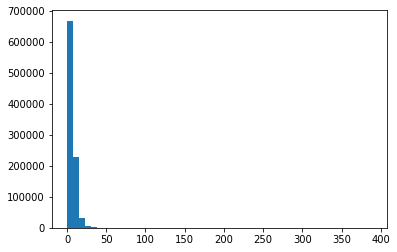

388
6.092775245729432


In [ ]:
import matplotlib.pyplot as plt

plt.hist([len(X) for X in X_train], bins=50)
plt.show()

print(max(len(X) for X in X_train))
print(sum(map(len, X_train))/len(X_train))

In [ ]:
threshold = 25
count = 0
for X in X_train:
    if len(X)<=threshold:
        count += 1
print(count/len(X_train))

0.9919212387362912


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
X_train = pad_sequences(X_train, maxlen=threshold)
X_test = pad_sequences(X_test, maxlen=threshold)

In [ ]:
import numpy as np

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
from tensorflow.keras.utils import to_categorical


In [ ]:
y_train = to_categorical(y_train, len(participants))
y_test = to_categorical(y_test, len(participants))

In [ ]:
y_train.shape

(938634, 62)

In [ ]:
y_test.shape

(51303, 62)

In [ ]:
max_len = threshold
vocab_size = 10000

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense, Input, Flatten, Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

embedding_dim = 128
dropout_ratio = (0.5, 0.8)
num_filters = 128
hidden_units = 128

In [ ]:
model_input = Input(shape = (max_len,))
z = Embedding(vocab_size, embedding_dim, input_length = max_len, name="embedding")(model_input)
z = Dropout(dropout_ratio[0])(z)

In [ ]:
conv_blocks = []

for sz in [3, 4, 5]:
    conv = Conv1D(filters = num_filters,
                         kernel_size = sz,
                         padding = "valid",
                         activation = "relu",
                         strides = 1)(z)
    conv = GlobalMaxPooling1D()(conv)
    conv_blocks.append(conv)

In [ ]:
z = Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]
z = Dropout(dropout_ratio[1])(z)
z = Dense(hidden_units, activation="relu")(z)
model_output = Dense(len(participants), activation="softmax")(z)

model = Model(model_input, model_output)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('CNN_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.fit(X_train, y_train, batch_size=64, epochs=10, validation_split=0.2, verbose=2, callbacks=[es, mc])

Epoch 1/10

Epoch 1: val_acc improved from -inf to 0.21827, saving model to CNN_model.h5
11733/11733 - 77s - loss: 3.1351 - acc: 0.2032 - val_loss: 3.0496 - val_acc: 0.2183 - 77s/epoch - 7ms/step
Epoch 2/10

Epoch 2: val_acc improved from 0.21827 to 0.22231, saving model to CNN_model.h5
11733/11733 - 66s - loss: 2.9620 - acc: 0.2420 - val_loss: 3.0314 - val_acc: 0.2223 - 66s/epoch - 6ms/step
Epoch 3/10

Epoch 3: val_acc improved from 0.22231 to 0.23204, saving model to CNN_model.h5
11733/11733 - 66s - loss: 2.9243 - acc: 0.2510 - val_loss: 3.0264 - val_acc: 0.2320 - 66s/epoch - 6ms/step
Epoch 4/10

Epoch 4: val_acc improved from 0.23204 to 0.24563, saving model to CNN_model.h5
11733/11733 - 66s - loss: 2.9045 - acc: 0.2567 - val_loss: 3.0395 - val_acc: 0.2456 - 66s/epoch - 6ms/step
Epoch 5/10

Epoch 5: val_acc did not improve from 0.24563
11733/11733 - 67s - loss: 2.8933 - acc: 0.2592 - val_loss: 3.0247 - val_acc: 0.2422 - 67s/epoch - 6ms/step
Epoch 6/10

Epoch 6: val_acc improved from

In [159]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from tqdm import tqdm

!pip install sentencepiece

import sentencepiece as spm
import csv

import random
import copy

import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.sequence import pad_sequences

import numpy as np

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense, Input, Flatten, Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
loaded_model = load_model('/content/drive/MyDrive/Colab Notebooks/chatClassifier/CNN_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

1604/1604 [==============================] - 5s 3ms/step - loss: 2.8196 - acc: 0.2962

 테스트 정확도: 0.2962


In [200]:
r = random.randint(0, len(X_test))
X = X_test[r]
Xl = X.tolist()
sentence = []
for x in Xl:
    if x!=0:
        sentence.append(sp.IdToPiece(x))

s = ''.join(i for i in sentence)
s = s.replace('▁', ' ')
if s[0]==' ':
    s = s[1:]
print(s)

X = np.expand_dims(X, axis=0)
# print(X.shape)
# print(X_test.shape)

pred = loaded_model.predict(X)
# print(pred)
idx = np.argmax(pred)
# print(idx)
idxs = np.argsort(pred)
# print(idxs)
idxs = idxs.tolist()
idxs = idxs[0]
idxs = idxs[::-1]
idxs = idxs[:5]
idxs

for e, i in enumerate(idxs):
    print(f'{e+1}) {index2name[i]}: {pred[0][i]*100:.2f}%')

염색체이상 나와서 주말숙제도 가져갑니다 ᅮ
1/1 [==============================] - 0s 20ms/step
1) 박찬홍/ 주생아/엉아들 잘부탁해~: 55.63%
2) 랄프: 4.15%
3) kich: 3.51%
4) 爱德华/잠실르엘판매중/25: 3.05%
5) Dool Lee/도시빈민/외노자: 2.14%


In [204]:
s = '아이고 대치동 랄슨상님!'

print(s)

s = [sp.encode_as_ids(s)]
s = pad_sequences(s, maxlen=threshold)
s.shape
pred = loaded_model.predict(s)
# print(pred)
idx = np.argmax(pred)
# print(idx)
idxs = np.argsort(pred)
# print(idxs)
idxs = idxs.tolist()
idxs = idxs[0]
idxs = idxs[::-1]
idxs = idxs[:5]
idxs

for e, i in enumerate(idxs):
    print(f'{e+1}) {index2name[i]}: {pred[0][i]*100:.2f}%')

아이고 대치동 랄슨상님!
1/1 [==============================] - 0s 21ms/step
1) 랄프: 14.28%
2) 爱德华/잠실르엘판매중/25: 13.24%
3) 박찬홍/ 주생아/엉아들 잘부탁해~: 9.21%
4) 심언니: 7.20%
5) Jinyoung. woo: 6.18%
